In [205]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


df = pd.read_excel("HistoricalPopulations.xlsx",usecols="B:R")
df



,Borough,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,City of London,7014,7359,7280,7115,7118,7131,7254,7607,7429,7472,7338,7412,7.204000e+03,6.848000e+03,6.872000e+03,7.160000e+03
1,Barking and Dagenham,163893,165654,166357,166210,165610,166275,167157,169031,172452,177580,182838,187029,1.909485e+05,1.947405e+05,1.986825e+05,2.023675e+05
2,Barnet,315784,319481,320552,321802,323723,327541,330801,334837,339212,345829,351438,357538,3.640706e+05,3.692026e+05,3.750296e+05,3.798056e+05
3,Bexley,218717,218757,219123,220016,220917,222391,223280,224625,226652,228146,230711,232774,2.344994e+05,2.369154e+05,2.400934e+05,2.423704e+05
4,Brent,264945,269620,269871,268323,268335,270939,276504,283273,290901,298118,304785,312245,3.154989e+05,3.181029e+05,3.216009e+05,3.248509e+05
5,Bromley,295317,296218,296668,297253,297307,299421,300963,302625,304968,306924,308560,310554,3.145917e+05,3.184547e+05,3.218337e+05,3.254127e+05
6,Camden,196174,202567,203972,204254,207341,211088,211032,211520,210273,212924,214725,220087,2.249610e+05,2.297180e+05,2.348450e+05,2.410580e+05
7,Croydon,334241,335112,335415,335919,337134,339052,340449,344029,349308,352763,357951,364815,3.688860e+05,3.727520e+05,3.760400e+05,3.790310e+05
8,Ealing,304370,307276,309242,308108,310073,312774,315329,318671,324022,329966,334073,339314,3.410222e+05,3.428452e+05,3.424692e+05,3.434102e+05
9,Enfield,275068,277266,280745,281835,282217,284779,287429,291534,297443,301971,307648,313935,3.173634e+05,3.206004e+05,3.246504e+05,3.285094e+05


In [158]:
df.head()

,Borough,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,City of London,7014,7359,7280,7115,7118,7131,7254,7607,7429,7472,7338,7412,7204.0000,6848.0000,6872.0000,7160.0000
1,Barking and Dagenham,163893,165654,166357,166210,165610,166275,167157,169031,172452,177580,182838,187029,190948.5356,194740.5356,198682.5356,202367.5356
2,Barnet,315784,319481,320552,321802,323723,327541,330801,334837,339212,345829,351438,357538,364070.5737,369202.5737,375029.5737,379805.5737
3,Bexley,218717,218757,219123,220016,220917,222391,223280,224625,226652,228146,230711,232774,234499.3952,236915.3952,240093.3952,242370.3952
4,Brent,264945,269620,269871,268323,268335,270939,276504,283273,290901,298118,304785,312245,315498.8738,318102.8738,321600.8738,324850.8738


In [159]:
ts = df.melt(id_vars=['Borough'],
             var_name='year', value_name='population')
ts.head()

,Borough,year,population
0,City of London,2000,7014.0
1,Barking and Dagenham,2000,163893.0
2,Barnet,2000,315784.0
3,Bexley,2000,218717.0
4,Brent,2000,264945.0


In [160]:
# Create a datetime series parsing the year strings.
# The data are mid-year estimates, so create timestampes
# to represent this.
ts['year'] = ts['year'].astype('str') +'/06/30'
ts['year'] = pd.to_datetime(ts['year'], format='%Y/%m/%d' )
# Assign the year column to the index, creating a DatetimeIndex.
ts.set_index('year', inplace=True)
# Conver the the DatetimeIndex to a PeriodIndex of day frequency.
ts = ts.to_period('D')
ts.head()

,Borough,population
year,,
2000-06-30,City of London,7014.0
2000-06-30,Barking and Dagenham,163893.0
2000-06-30,Barnet,315784.0
2000-06-30,Bexley,218717.0
2000-06-30,Brent,264945.0


In [161]:
# Assign all indicator variables to the index.
ts.set_index(['Borough'],
             inplace=True, append=True)
ts.sort_index(inplace=True)
ts.head()

population
year       Borough                         
2000-06-30 Barking and Dagenham    163893.0
           Barnet                  315784.0
           Bexley                  218717.0
           Brent                   264945.0
           Bromley                 295317.0

In [162]:
ts.loc[("2000")].head()

population
year       Borough                         
2000-06-30 Barking and Dagenham    163893.0
           Barnet                  315784.0
           Bexley                  218717.0
           Brent                   264945.0
           Bromley                 295317.0

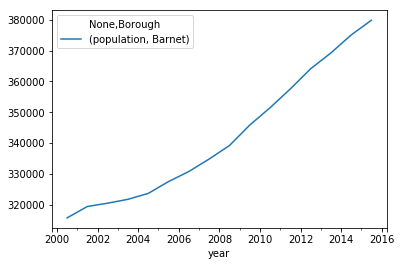

In [163]:
xs = ts.loc[
    (
        slice(None),
        'Barnet'
    ),
    :
]

xs.unstack().plot()

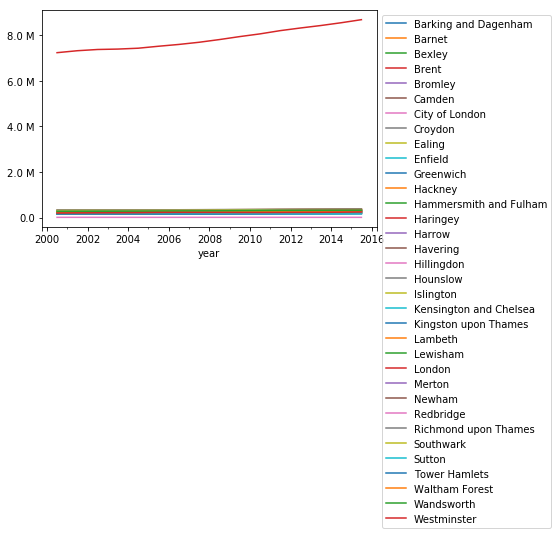

In [164]:
from matplotlib.ticker import EngFormatter
#inner = ts.xs('inner', level='location').unstack() 
ax = ts['population'].unstack().plot()
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [165]:
ts["population"]

year        Borough               
2000-06-30  Barking and Dagenham      1.638930e+05
            Barnet                    3.157840e+05
            Bexley                    2.187170e+05
            Brent                     2.649450e+05
            Bromley                   2.953170e+05
            Camden                    1.961740e+05
            City of London            7.014000e+03
            Croydon                   3.342410e+05
            Ealing                    3.043700e+05
            Enfield                   2.750680e+05
            Greenwich                 2.144380e+05
            Hackney                   2.033810e+05
            Hammersmith and Fulham    1.643930e+05
            Haringey                  2.198450e+05
            Harrow                    2.091140e+05
            Havering                  2.251410e+05
            Hillingdon                2.459110e+05
            Hounslow                  2.147310e+05
            Islington                 1.778520e

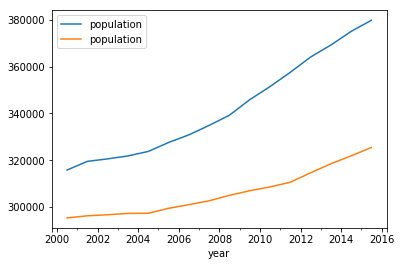

In [166]:
#ax = ts.xs('Greenwich', level='borough').plot()
#ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.show()

ts.unstack()


#ax = ts.xs('outer', level='location').unstack().plot(kind='line',stacked=False)
#ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.show()


#ax = ts.xs('Lewisham', level='borough').unstack().plot(kind='line',stacked=False)
#ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.show()

barnet = ts.xs('Barnet', level='Borough')
lewisham = ts.xs('Bromley', level='Borough')

ax = barnet.plot()
lewisham.plot(ax=ax)
plt.show()

In [167]:
df = pd.read_excel("JobDen.xlsx",usecols="B:R")
df

,Area,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,City of London,361000,339000,344000,344000,332000,343000,337000,350000,348000,362000,388000,436000,449000,463000,498000,541000
1,Barking and Dagenham,57000,54000,52000,55000,53000,53000,51000,52000,53000,47000,51000,54000,55000,54000,59000,62000
2,Barnet,138000,138000,135000,138000,135000,136000,138000,136000,140000,143000,141000,147000,154000,159000,165000,168000
3,Bexley,76000,75000,79000,77000,85000,80000,73000,74000,73000,73000,77000,78000,78000,80000,80000,86000
4,Brent,122000,116000,116000,119000,119000,118000,110000,111000,109000,110000,114000,115000,123000,125000,131000,136000
5,Bromley,115000,114000,119000,125000,126000,125000,126000,136000,130000,119000,120000,119000,122000,129000,127000,124000
6,Camden,291000,294000,287000,279000,278000,292000,280000,296000,307000,309000,307000,331000,344000,355000,379000,383000
7,Croydon,160000,156000,149000,153000,153000,150000,148000,152000,146000,134000,138000,136000,141000,130000,142000,144000
8,Ealing,134000,134000,133000,137000,136000,138000,136000,140000,131000,128000,128000,148000,148000,152000,159000,163000
9,Enfield,113000,111000,104000,111000,110000,116000,106000,108000,111000,107000,112000,110000,117000,118000,127000,133000


In [175]:
df.head()

,Area,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,City of London,361000,339000,344000,344000,332000,343000,337000,350000,348000,362000,388000,436000,449000,463000,498000,541000
1,Barking and Dagenham,57000,54000,52000,55000,53000,53000,51000,52000,53000,47000,51000,54000,55000,54000,59000,62000
2,Barnet,138000,138000,135000,138000,135000,136000,138000,136000,140000,143000,141000,147000,154000,159000,165000,168000
3,Bexley,76000,75000,79000,77000,85000,80000,73000,74000,73000,73000,77000,78000,78000,80000,80000,86000
4,Brent,122000,116000,116000,119000,119000,118000,110000,111000,109000,110000,114000,115000,123000,125000,131000,136000


In [176]:
ts = df.melt(id_vars=['Area'],
             var_name='year', value_name='JobDensity')
ts.head()

,Area,year,JobDensity
0,City of London,2000,361000
1,Barking and Dagenham,2000,57000
2,Barnet,2000,138000
3,Bexley,2000,76000
4,Brent,2000,122000


In [186]:
xs = ts.loc[
    (
        slice(None),
        'Barnet'
    ),
    :
]

xs.unstack().plot()

TypeError: unhashable type: 'slice'

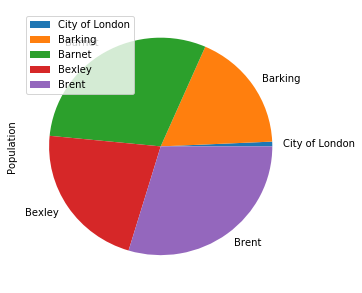

In [213]:
df = pd.DataFrame({'Population': [7412, 187029, 315784, 230711, 312245],
'radius': [2439.7, 6051.8, 6378.1,1,1]},
index=['City of London', 'Barking', 'Barnet','Bexley','Brent'])
plot = df.plot.pie(y='Population', figsize=(5, 5))

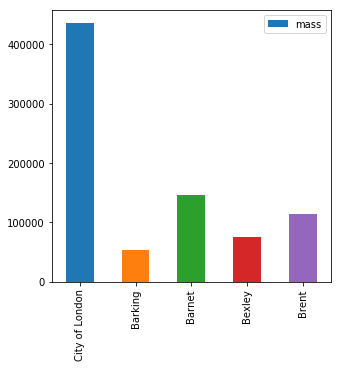

In [220]:
 df = pd.DataFrame({'mass': [436000, 54000 , 147000, 76000, 115000],
'radius': [2439.7, 6051.8, 6378.1,1 ,1]},
index=['City of London', 'Barking', 'Barnet','Bexley','Brent'])
plot = df.plot.bar(y='mass', figsize=(5, 5))